In [11]:
!pip install numpy


In [12]:
!pip install  scipy

In [13]:
!pip install matplotlib

Estadístico de Kolmogorov-Smirnov: 0.1036


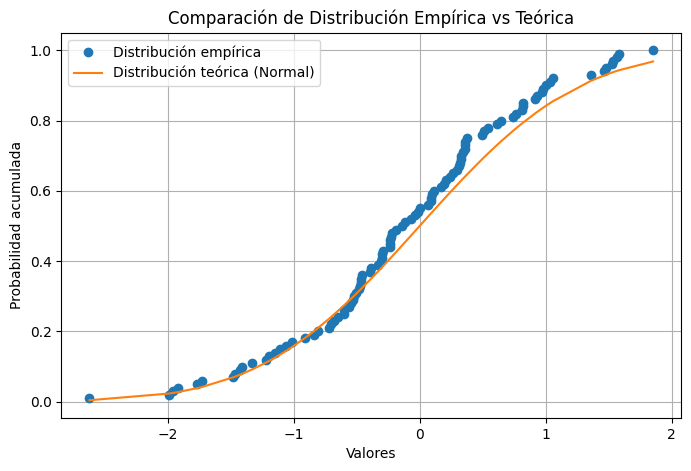

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Función para calcular la distribución acumulada empírica
def distribucion_acumulada_empirica(datos):
    datos_ordenados = np.sort(datos)
    n = len(datos)
    F_empirica = np.arange(1, n+1) / n
    return datos_ordenados, F_empirica

# Función para la distribución acumulada teórica (normal estándar)
def distribucion_normal(x):
    return (1 + erf(x / np.sqrt(2))) / 2
# Función para calcular la estadística de Kolmogorov-Smirnov
def kolmogorov_smirnov_test(datos, distribucion_teorica):
    datos_ordenados, F_empirica = distribucion_acumulada_empirica(datos)
    F_teorica = distribucion_teorica(datos_ordenados)
    D_n = np.max(np.abs(F_empirica - F_teorica))
    return D_n


# Generar datos de ejemplo (distribución normal)
np.random.seed(42)
datos = np.random.normal(loc=0, scale=1, size=100)

# Obtener distribuciones
datos_ordenados, F_empirica = distribucion_acumulada_empirica(datos)
F_teorica = distribucion_normal(datos_ordenados)

D_n = kolmogorov_smirnov_test(datos, distribucion_normal)

# Mostrar resultados
print(f"Estadístico de Kolmogorov-Smirnov: {D_n:.4f}")


# Graficar las distribuciones
plt.figure(figsize=(8, 5))
plt.plot(datos_ordenados, F_empirica, marker='o', linestyle='', label="Distribución empírica")
plt.plot(datos_ordenados, F_teorica, linestyle='-', label="Distribución teórica (Normal)")
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.title("Comparación de Distribución Empírica vs Teórica")
plt.legend()
plt.grid()
plt.show()